In [ ]:
!pip install statsmodels

In [ ]:
!pip install yfinance


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

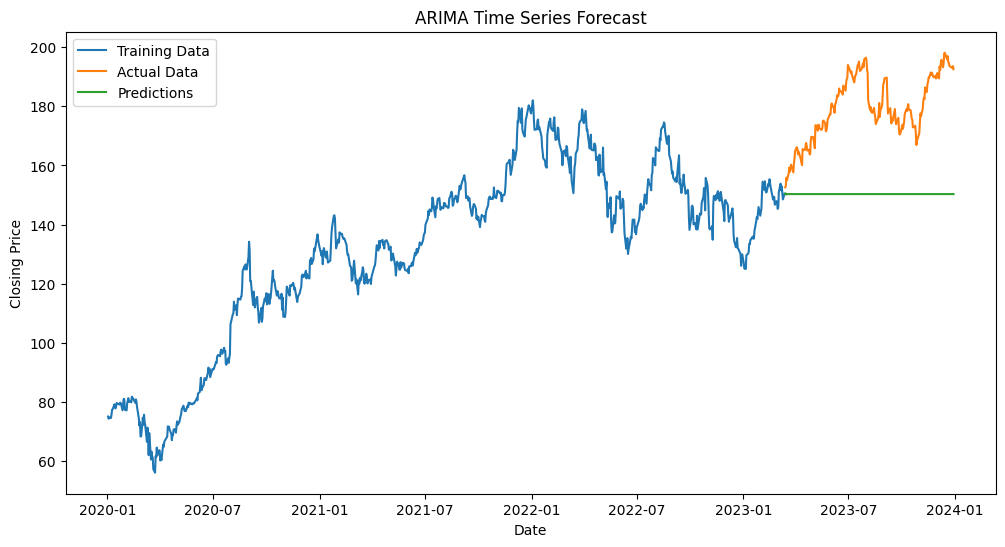

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Tải dữ liệu từ Yahoo Finance
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data = time_series[:int(0.8*len(time_series))]
test_data = time_series[int(0.8*len(time_series)):]

# Xây dựng mô hình ARIMA
p = 5  # Tham số AR (p)
d = 1  # Bậc của việc khử mùa vụ (d)
q = 2  # Tham số MA (q)

model = ARIMA(train_data, order=(p, d, q))
fitted_model = model.fit()

# Dự đoán trên tập kiểm tra
predictions = fitted_model.forecast(steps=len(test_data))

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=6.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4427.396, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4208.550, Time=0.90 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4423.931, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4096.538, Time=1.99 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=10.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4098.136, Time=0.73 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4097.804, Time=1.93 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4097.968, Time=2.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4096.323, Time=0.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4208.647, Time=0.42 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=15.67 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AI

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


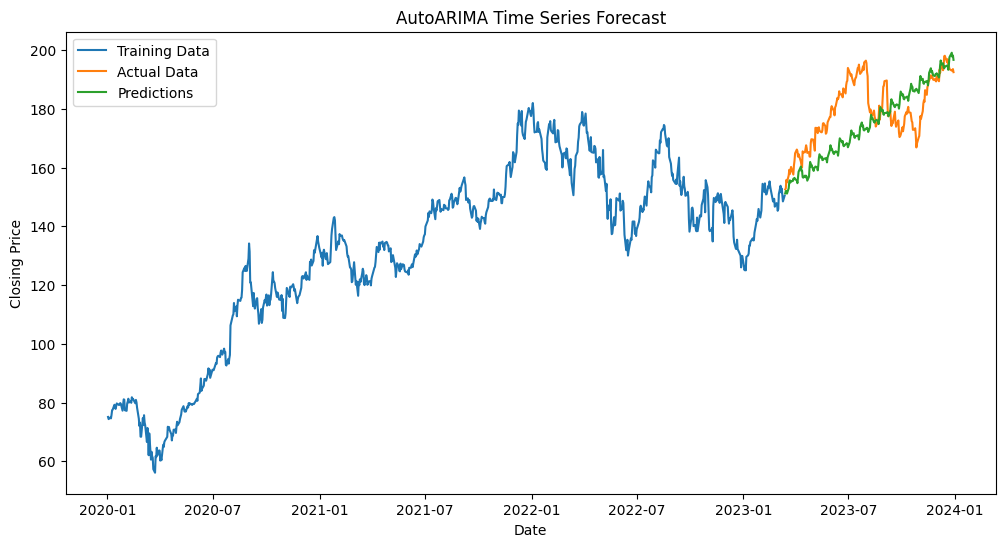

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Tải dữ liệu từ Yahoo Finance
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data = time_series[:int(0.8*len(time_series))]
test_data = time_series[int(0.8*len(time_series)):]

# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
predictions = model.predict(n_periods=len(test_data))

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Lấy dữ liệu giá Bitcoin từ yfinance
bitcoin_data = yf.download('BTC-USD', start='2015-01-01', end='2024-01-01')

# Chỉ lấy cột 'Close' làm dữ liệu đầu vào
bitcoin_data = bitcoin_data[['Close']]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(bitcoin_data)

# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Hàm tạo dữ liệu cho mô hình RNN
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Dự đoán giá Bitcoin trên tập kiểm tra
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

# Vẽ biểu đồ kết quả dự đoán
train = bitcoin_data[:train_size]
valid = bitcoin_data[train_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
40/40 [==============================] - 13s 188ms/step - loss: 0.0110
Epoch 2/100
40/40 [==============================] - 7s 163ms/step - loss: 0.0012
Epoch 3/100
40/40 [==============================] - 7s 178ms/step - loss: 0.0011
Epoch 4/100
40/40 [==============================] - 7s 175ms/step - loss: 0.0010
Epoch 5/100
40/40 [==============================] - 7s 164ms/step - loss: 9.2085e-04
Epoch 6/100
40/40 [==============================] - 12s 301ms/step - loss: 8.5260e-04
Epoch 7/100
40/40 [==============================] - 9s 233ms/step - loss: 0.0010
Epoch 8/100
40/40 [==============================] - 6s 158ms/step - loss: 8.1610e-04
Epoch 9/100
40/40 [==============================] - 7s 187ms/step - loss: 7.2427e-04
Epoch 10/100
40/40 [==============================] - 12s 310ms/step - loss: 9.0801e-04
Epoch 11/100
40/40 [==============================] - 12s 311ms/step - loss: 6.4815e-04
Epoch 12/100
40/40 [==============================] - 6s 155ms/step 

ValueError: Length of values (557) does not match length of index (658)

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Lấy dữ liệu giá Bitcoin từ yfinance
bitcoin_data = yf.download('BTC-USD', start='2015-01-01', end='2024-01-01')

# Chỉ lấy cột 'Close' làm dữ liệu đầu vào
bitcoin_data = bitcoin_data[['Close']]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(bitcoin_data)

# Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Hàm tạo dữ liệu cho mô hình LSTM
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Thiết lập tham số cho mô hình
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape lại dữ liệu cho phù hợp với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Dự đoán giá Bitcoin trên tập kiểm tra
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Đánh giá mô hình
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

# Vẽ biểu đồ kết quả dự đoán
train = bitcoin_data[:train_size]
valid = bitcoin_data[train_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
